## Fetching Dataset

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
x, y = mnist['data'], mnist['target']

In [4]:
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
%matplotlib inline

In [7]:
import matplotlib
import matplotlib.pyplot as plt

In [8]:
some_digit = x[3601]
some_digit_image = some_digit.reshape(28, 28) # lets reshape it to plot it

(-0.5, 27.5, 27.5, -0.5)

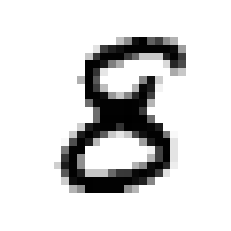

In [9]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [10]:
y[3601]

'8'

In [11]:
x_train, x_test = x[0:6000], x[6000:7000]

In [12]:
y_train, y_test = y[0:6000], y[6000:7000]

In [13]:
import numpy as np
shuffle_index = np.random.permutation(6000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

## Creating a 2 detector

In [14]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [15]:
y_train

array([5, 1, 2, ..., 3, 7, 6], dtype=int8)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
clf = LogisticRegression(tol = 0.1, solver='lbfgs')

In [18]:
clf.fit(x_train, y_train_2)

c:\users\haris\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.1, verbose=0,
                   warm_start=False)

In [19]:
clf.predict([some_digit])

array([False])

In [20]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")

c:\users\haris\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\haris\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\haris\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [21]:
a.mean()

0.9570000764583524

## Quiz

In [22]:
# Create a classifier which will classify a digit always as "not 2"
# 90% --> not 2

SyntaxError: invalid syntax (<ipython-input-22-b5aaf849eafd>, line 1)

In [23]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, x_train, y_train_2, cv=3)

c:\users\haris\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\haris\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\haris\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [24]:
y_train_pred


array([False, False,  True, ..., False, False, False])

## Calculating confusion matrix

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y_train_2, y_train_pred)

array([[5278,  141],
       [ 117,  464]], dtype=int64)

In [27]:
confusion_matrix(y_train_2, y_train_2) # This is the confusion matrix for perfect predictions

array([[5419,    0],
       [   0,  581]], dtype=int64)

## Precision and Recall

In [28]:
from sklearn.metrics import precision_score, recall_score

In [29]:
precision_score(y_train_2, y_train_pred) # This is my precision score

0.7669421487603306

In [30]:
recall_score(y_train_2, y_train_pred) # This is my recall score

0.7986230636833046

## F1 - Score

In [31]:
from sklearn.metrics import f1_score

In [32]:
f1_score(y_train_2, y_train_pred)

0.7824620573355817

## Precision Recall Curve

In [33]:
from sklearn.metrics import precision_recall_curve

In [39]:
y_scores = cross_val_predict(clf, x_train, y_train_2, cv=3, method="decision_function")

c:\users\haris\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\haris\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\haris\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [40]:
y_scores

array([ -34.2506764 ,  -84.97565616,   78.6099086 , ..., -185.32718176,
        -41.65233892,  -75.31742814])

In [41]:
precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_scores)

In [42]:
precisions

array([0.10506329, 0.10490143, 0.10492041, ..., 1.        , 1.        ,
       1.        ])

In [43]:
recalls

array([1.        , 0.99827883, 0.99827883, ..., 0.00344234, 0.00172117,
       0.        ])

In [44]:
thresholds

array([-198.9489219 , -198.86577235, -198.62731148, ...,  188.1993632 ,
        191.96036648,  198.93359138])

## Plotting the Precision Recall Curve

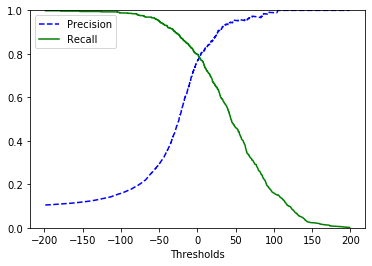

In [48]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()